# TikzPicture in SageMath 9.6

The module `sage.misc.latex_standalone` was added in SageMath 9.6. It contains two classes:

 - `Standalone`
 - `TikzPicture` (which inherits from `Standalone`)

Documentation is here (new in SageMath 9.6):
https://doc.sagemath.org/html/en/reference/misc/sage/misc/latex_standalone.html

This is a presentation done by Sébastien Labbé during the Bordeaux Sage Thursdays on June 2, 2022.
Also part of the Global Virtual Sage Days 112.358 at https://wiki.sagemath.org/days112.358

## `Standalone` to deal with Standalone LaTeX Document class

In [1]:
from sage.misc.latex_standalone import Standalone

In [2]:
a = Standalone('Hello World')

In [3]:
a

In [4]:
print(a)

\RequirePackage{luatex85}
\documentclass{standalone}
\begin{document}
Hello World
\end{document}


In [5]:
a.pdf()

'/tmp/tmpnju79mm8/tikz_s21a1qjk.pdf'

In [6]:
a.pdf('locally.pdf')

'/home/slabbe/Documents/Presentations/2022-06-tikzpicture/locally.pdf'

In [7]:
a.svg()

'/tmp/tmpnju79mm8/tikz_r0qo10at.svg'

In [8]:
b = Standalone('Hello World', 
           document_class_options=["beamer"],
           standalone_config=["border=4mm"], 
           usepackage=['amsmath'])

In [9]:
print(b)

\RequirePackage{luatex85}
\documentclass[beamer]{standalone}
\standaloneconfig{border=4mm}
\usepackage{amsmath}
\begin{document}
Hello World
\end{document}


## `TikzPicture` to deal with tikzpicture within a Standalone LaTeX document class

In [10]:
from sage.misc.latex_standalone import TikzPicture

In [11]:
TikzPicture.mro()

[<class 'sage.misc.latex_standalone.TikzPicture'>,
 <class 'sage.misc.latex_standalone.Standalone'>,
 <class 'sage.structure.sage_object.SageObject'>,
 <class 'object'>]

### Example 1

In [12]:
lines = []
lines.append(r'\begin{tikzpicture}')
lines.append(r'\draw (0,0) -- (1,1);')
lines.append(r'\end{tikzpicture}')
lines

['\\begin{tikzpicture}', '\\draw (0,0) -- (1,1);', '\\end{tikzpicture}']

In [13]:
t = TikzPicture('\n'.join(lines))
print(t)

\RequirePackage{luatex85}
\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}
\draw (0,0) -- (1,1);
\end{tikzpicture}
\end{document}


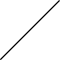

In [14]:
t

### Example 2: A random walk in the plane:

In [15]:
steps = ['-- ++ (1,0)', '-- ++ (0,1)', '-- ++ (-1,0)', '-- ++ (0,-1)']
path = ' '.join([choice(steps) for _ in range(20)])
lines = []
lines.append(r'\begin{tikzpicture}')
lines.append(r'\draw[very thick,->] (0,0) {};'.format(path))
lines.append(r'\end{tikzpicture}')
print('\n'.join(lines))

\begin{tikzpicture}
\draw[very thick,->] (0,0) -- ++ (0,-1) -- ++ (0,1) -- ++ (0,-1) -- ++ (0,-1) -- ++ (0,-1) -- ++ (0,-1) -- ++ (-1,0) -- ++ (-1,0) -- ++ (1,0) -- ++ (0,1) -- ++ (0,1) -- ++ (-1,0) -- ++ (0,-1) -- ++ (0,-1) -- ++ (0,1) -- ++ (-1,0) -- ++ (0,1) -- ++ (0,1) -- ++ (0,1) -- ++ (0,-1);
\end{tikzpicture}


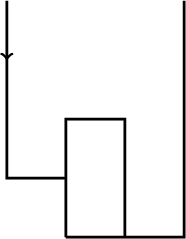

In [16]:
TikzPicture('\n'.join(lines), standalone_config=["border=4mm"])

In [17]:
t = _

In [18]:
print(t)

\RequirePackage{luatex85}
\documentclass[tikz]{standalone}
\standaloneconfig{border=4mm}
\begin{document}
\begin{tikzpicture}
\draw[very thick,->] (0,0) -- ++ (0,-1) -- ++ (0,1) -- ++ (0,-1) -- ++ (0,-1) -- ++ (0,-1) -- ++ (0,-1) -- ++ (-1,0) -- ++ (-1,0) -- ++ (1,0) -- ++ (0,1) -- ++ (0,1) -- ++ (-1,0) -- ++ (0,-1) -- ++ (0,-1) -- ++ (0,1) -- ++ (-1,0) -- ++ (0,1) -- ++ (0,1) -- ++ (0,1) -- ++ (0,-1);
\end{tikzpicture}
\end{document}


### Example 3: A Polyhedron:

In [19]:
from sage.misc.latex_standalone import TikzPicture

In [20]:
V = [[1,0,1],[1,0,0],[1,1,0],[0,0,-1],[0,1,0],[-1,0,0],[0,1,1],[0,0,1],[0,-1,0]]
P = Polyhedron(vertices=V).polar()
P.plot()

Graphics3d Object

In [21]:
s = P.projection().tikz([674,108,-731],112)
s

\begin{tikzpicture}%
	[x={(0.249656cm, -0.577639cm)},
	y={(0.777700cm, -0.358578cm)},
	z={(-0.576936cm, -0.733318cm)},
	scale=1.000000,
	back/.style={loosely dotted, thin},
	edge/.style={color=blue!95!black, thick},
	facet/.style={fill=blue!95!black,fill opacity=0.800000},
	vertex/.style={inner sep=1pt,circle,draw=green!25!black,fill=green!75!black,thick}]
%
%
%% This TikZ-picture was produced with Sagemath version 9.7.beta1
%% with the command: ._tikz_3d_in_3d and parameters:
%% view = [674, 108, -731]
%% angle = 112
%% scale = 1
%% edge_color = blue!95!black
%% facet_color = blue!95!black
%% opacity = 0.8
%% vertex_color = green
%% axis = False

%% Coordinate of the vertices:
%%
\coordinate (0.00000, 1.00000, -1.00000) at (0.00000, 1.00000, -1.00000);
\coordinate (1.00000, 1.00000, -1.00000) at (1.00000, 1.00000, -1.00000);
\coordinate (1.00000, 1.00000, 1.00000) at (1.00000, 1.00000, 1.00000);
\coordinate (1.00000, -1.00000, 1.00000) at (1.00000, -1.00000, 1.00000);
\coordinate (1.0

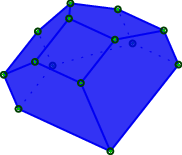

In [22]:
t = TikzPicture(s)
t

In [23]:
t.pdf('file.pdf')

'/home/slabbe/Documents/Presentations/2022-06-tikzpicture/file.pdf'

In [24]:
t.tex('file.tex', content_only=True)

'/home/slabbe/Documents/Presentations/2022-06-tikzpicture/file.tex'

### Example 4: Graphs

In [25]:
g = graphs.PetersenGraph()

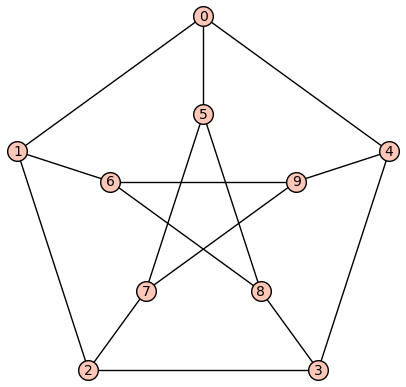

In [26]:
g.plot()

In [27]:
g.get_pos()

{0: (0.0, 1.0),
 1: (-0.9510565163, 0.3090169944),
 2: (-0.5877852523, -0.8090169944),
 3: (0.5877852523, -0.8090169944),
 4: (0.9510565163, 0.3090169944),
 5: (0.0, 0.5),
 6: (-0.47552825815, 0.1545084972),
 7: (-0.29389262615, -0.4045084972),
 8: (0.29389262615, -0.4045084972),
 9: (0.47552825815, 0.1545084972)}

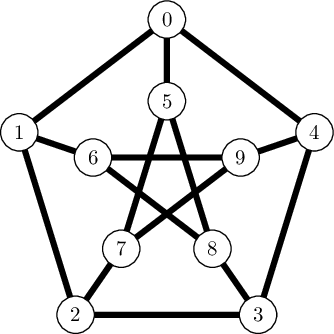

In [28]:
TikzPicture(latex(g), usepackage=['tkz-graph'])

### Example 5: Aperiodic Wang tilings

In [29]:
from slabbe import WangTileSet

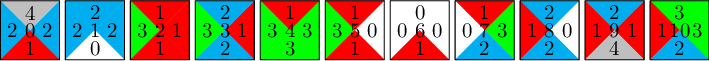

In [30]:
tiles = [(2,4,2,1), (2,2,2,0), (1,1,3,1), (1,2,3,2), (3,1,3,3),
         (0,1,3,1), (0,0,0,1), (3,1,0,2), (0,2,1,2), (1,2,1,4), (3,3,1,2)]
T0 = WangTileSet(tiles)
color = {0:'white', 1:'red', 2:'cyan', 3:'green', 4:'lightgray'}
T0.tikz(color=color, ncolumns=11)

In [31]:
solver = T0.solver(50, 50)

In [32]:
%time tiling = solver.solve(solver='glucose')
tiling

CPU times: user 1.17 s, sys: 62.7 ms, total: 1.23 s
Wall time: 2.5 s


A wang tiling of a 50 x 50 rectangle

CPU times: user 67.1 ms, sys: 415 µs, total: 67.5 ms
Wall time: 66.3 ms


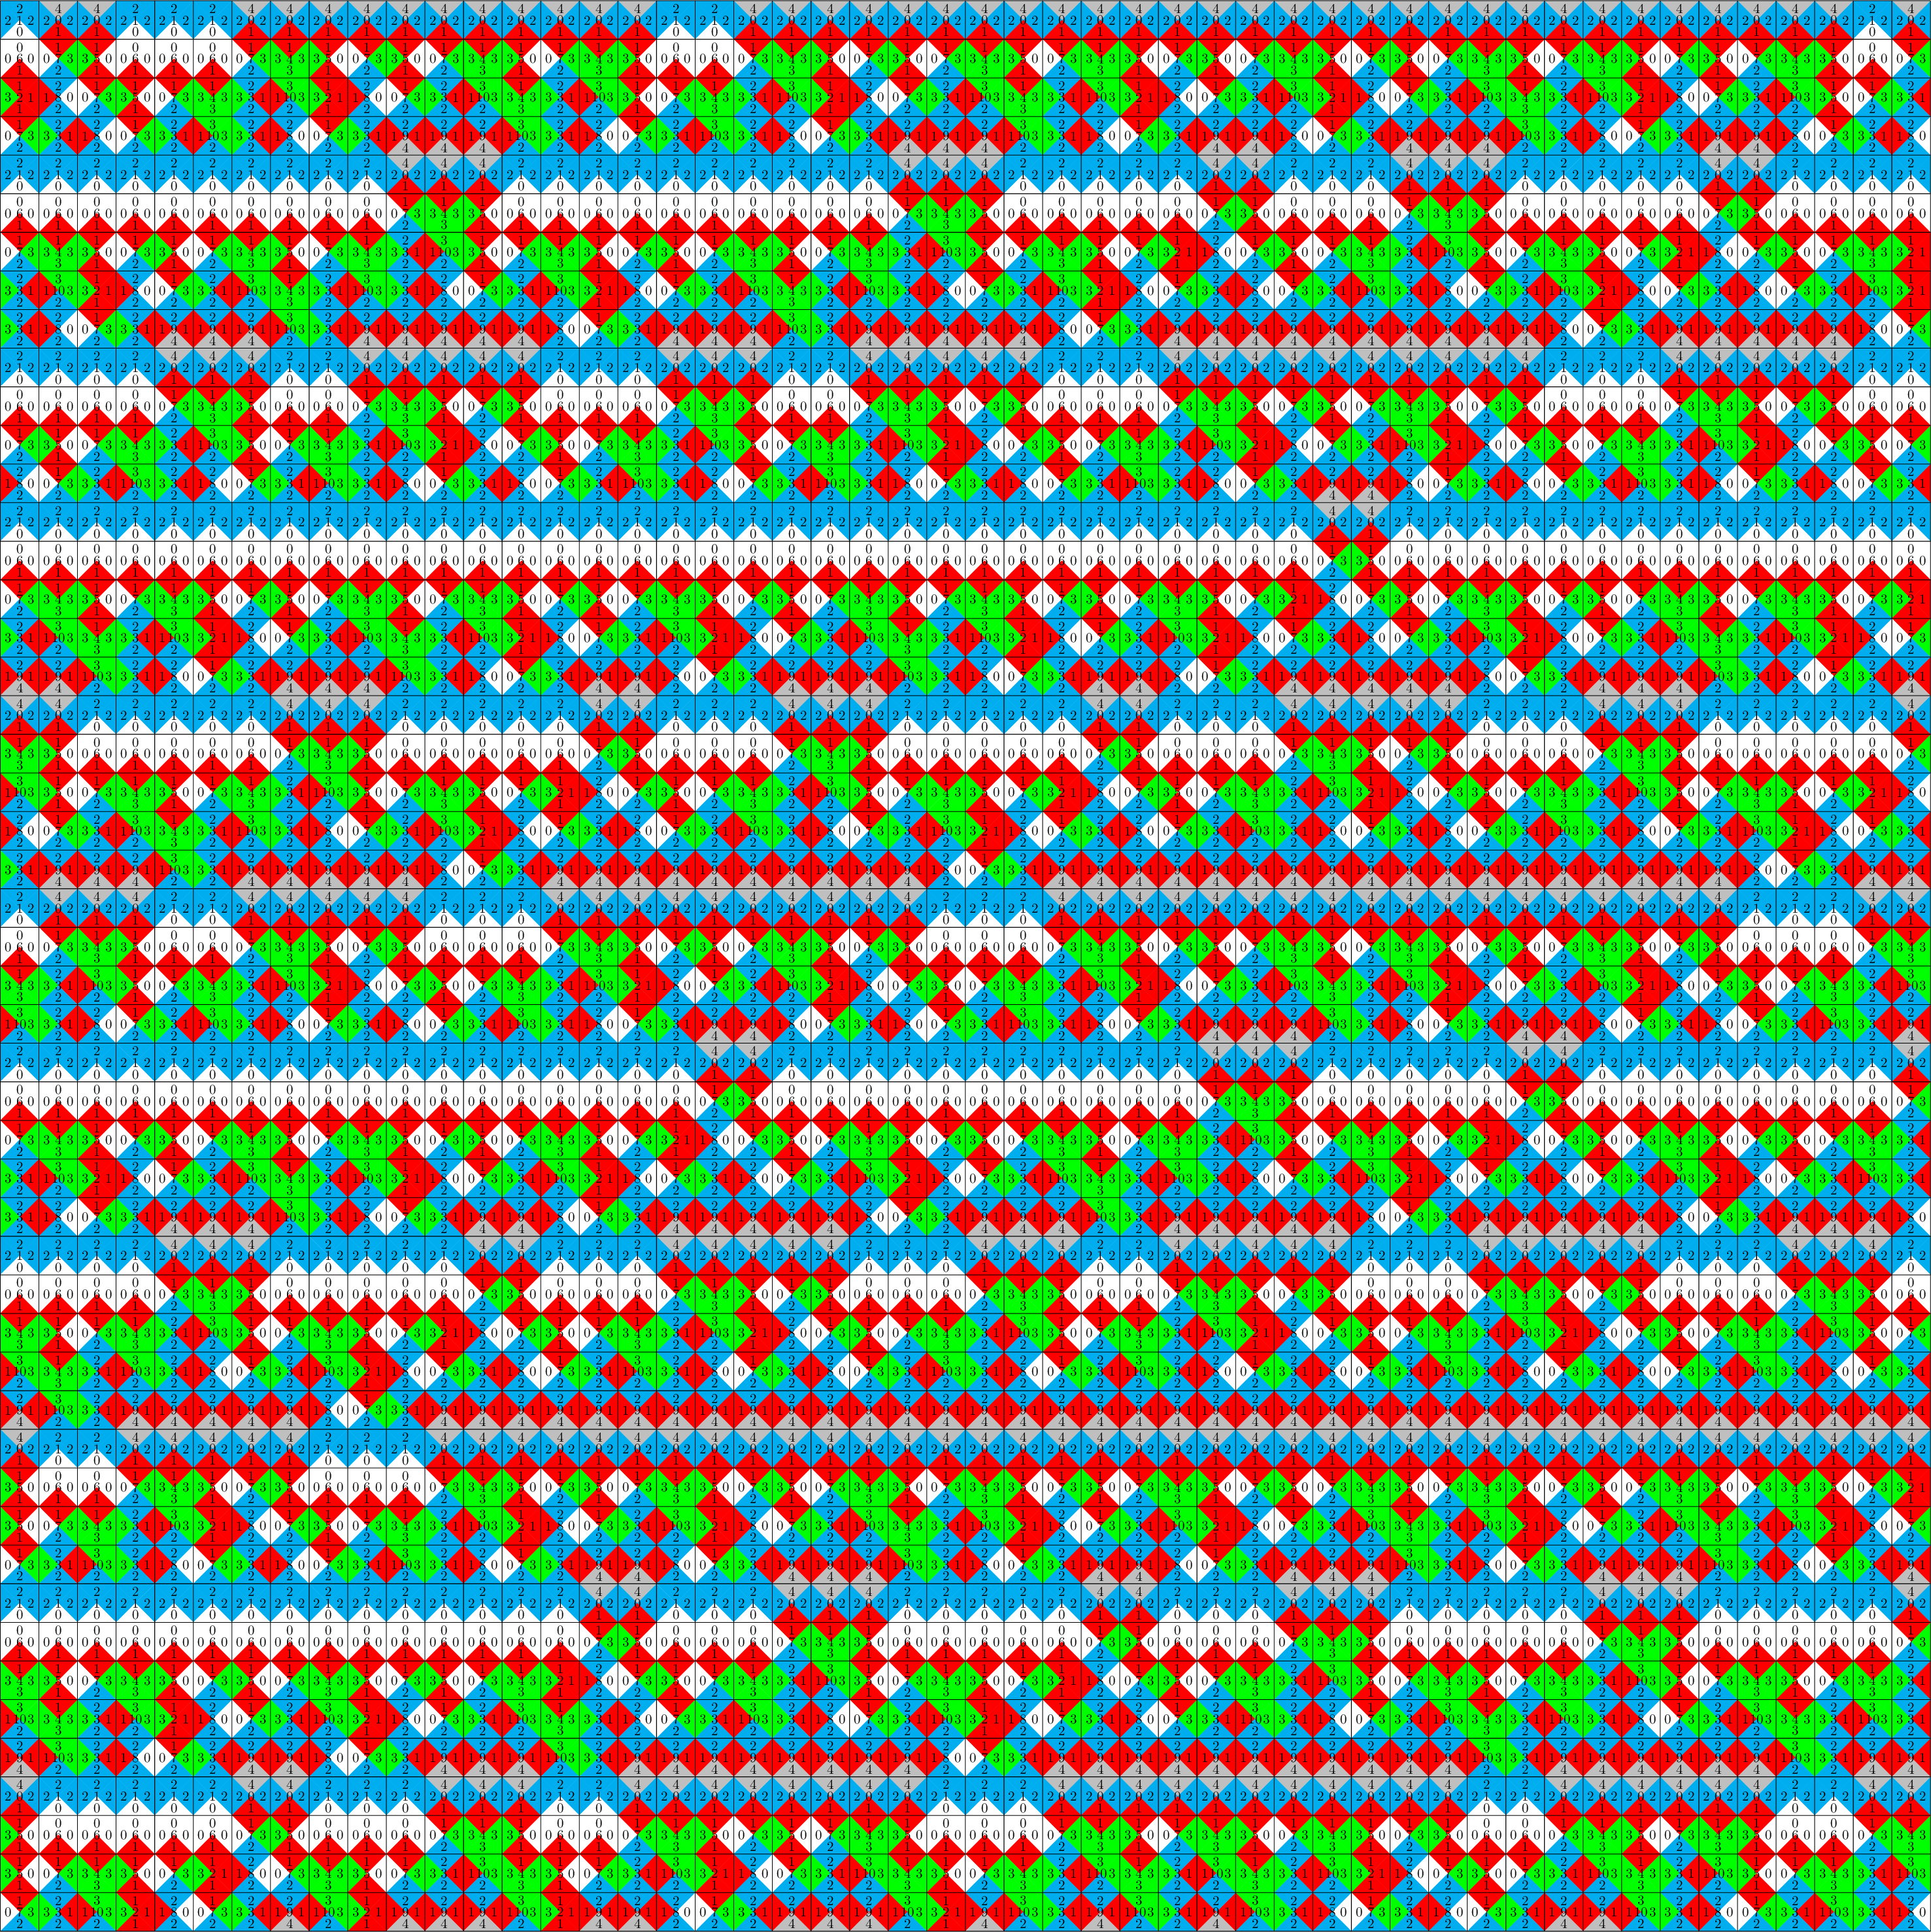

In [33]:
%time tiling.tikz(color=color)

# More examples with graphs

In [34]:
F = GF(3)
gens = [matrix(F,2,[1,0, 1,1]), matrix(F,2, [1,1, 0,1])]
group = MatrixGroup(gens)
group

Matrix group over Finite Field of size 3 with 2 generators (
[1 0]  [1 1]
[1 1], [0 1]
)

In [35]:
group.cardinality()

24

We plot its Cayley graph with Sage:

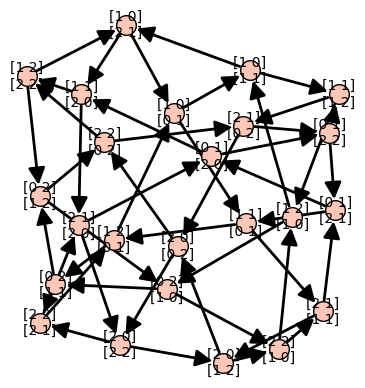

In [36]:
G = group.cayley_graph()
G.plot()

Ploting again gives a different look:

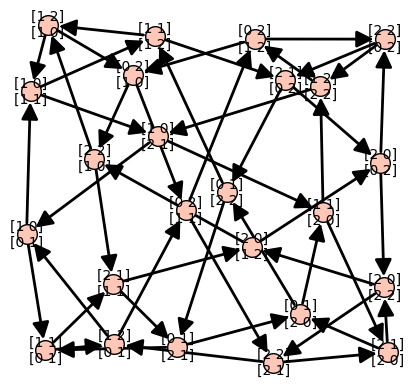

In [37]:
G.plot()

If `graphviz` and `dot2tex` are installed, the following turns the graph into a tikzpicture. It shows a `Future Warning` because the method `from_graph` will be replaced in the future in favor of a method of the graph class instead.

/tmp/ipykernel_371246/842282279.py:1: FutureWarning: This class/method/function is marked as experimental. It, its functionality or its interface might change without a formal deprecation.
See http://trac.sagemath.org/20343 for details.
  TikzPicture.from_graph(G)


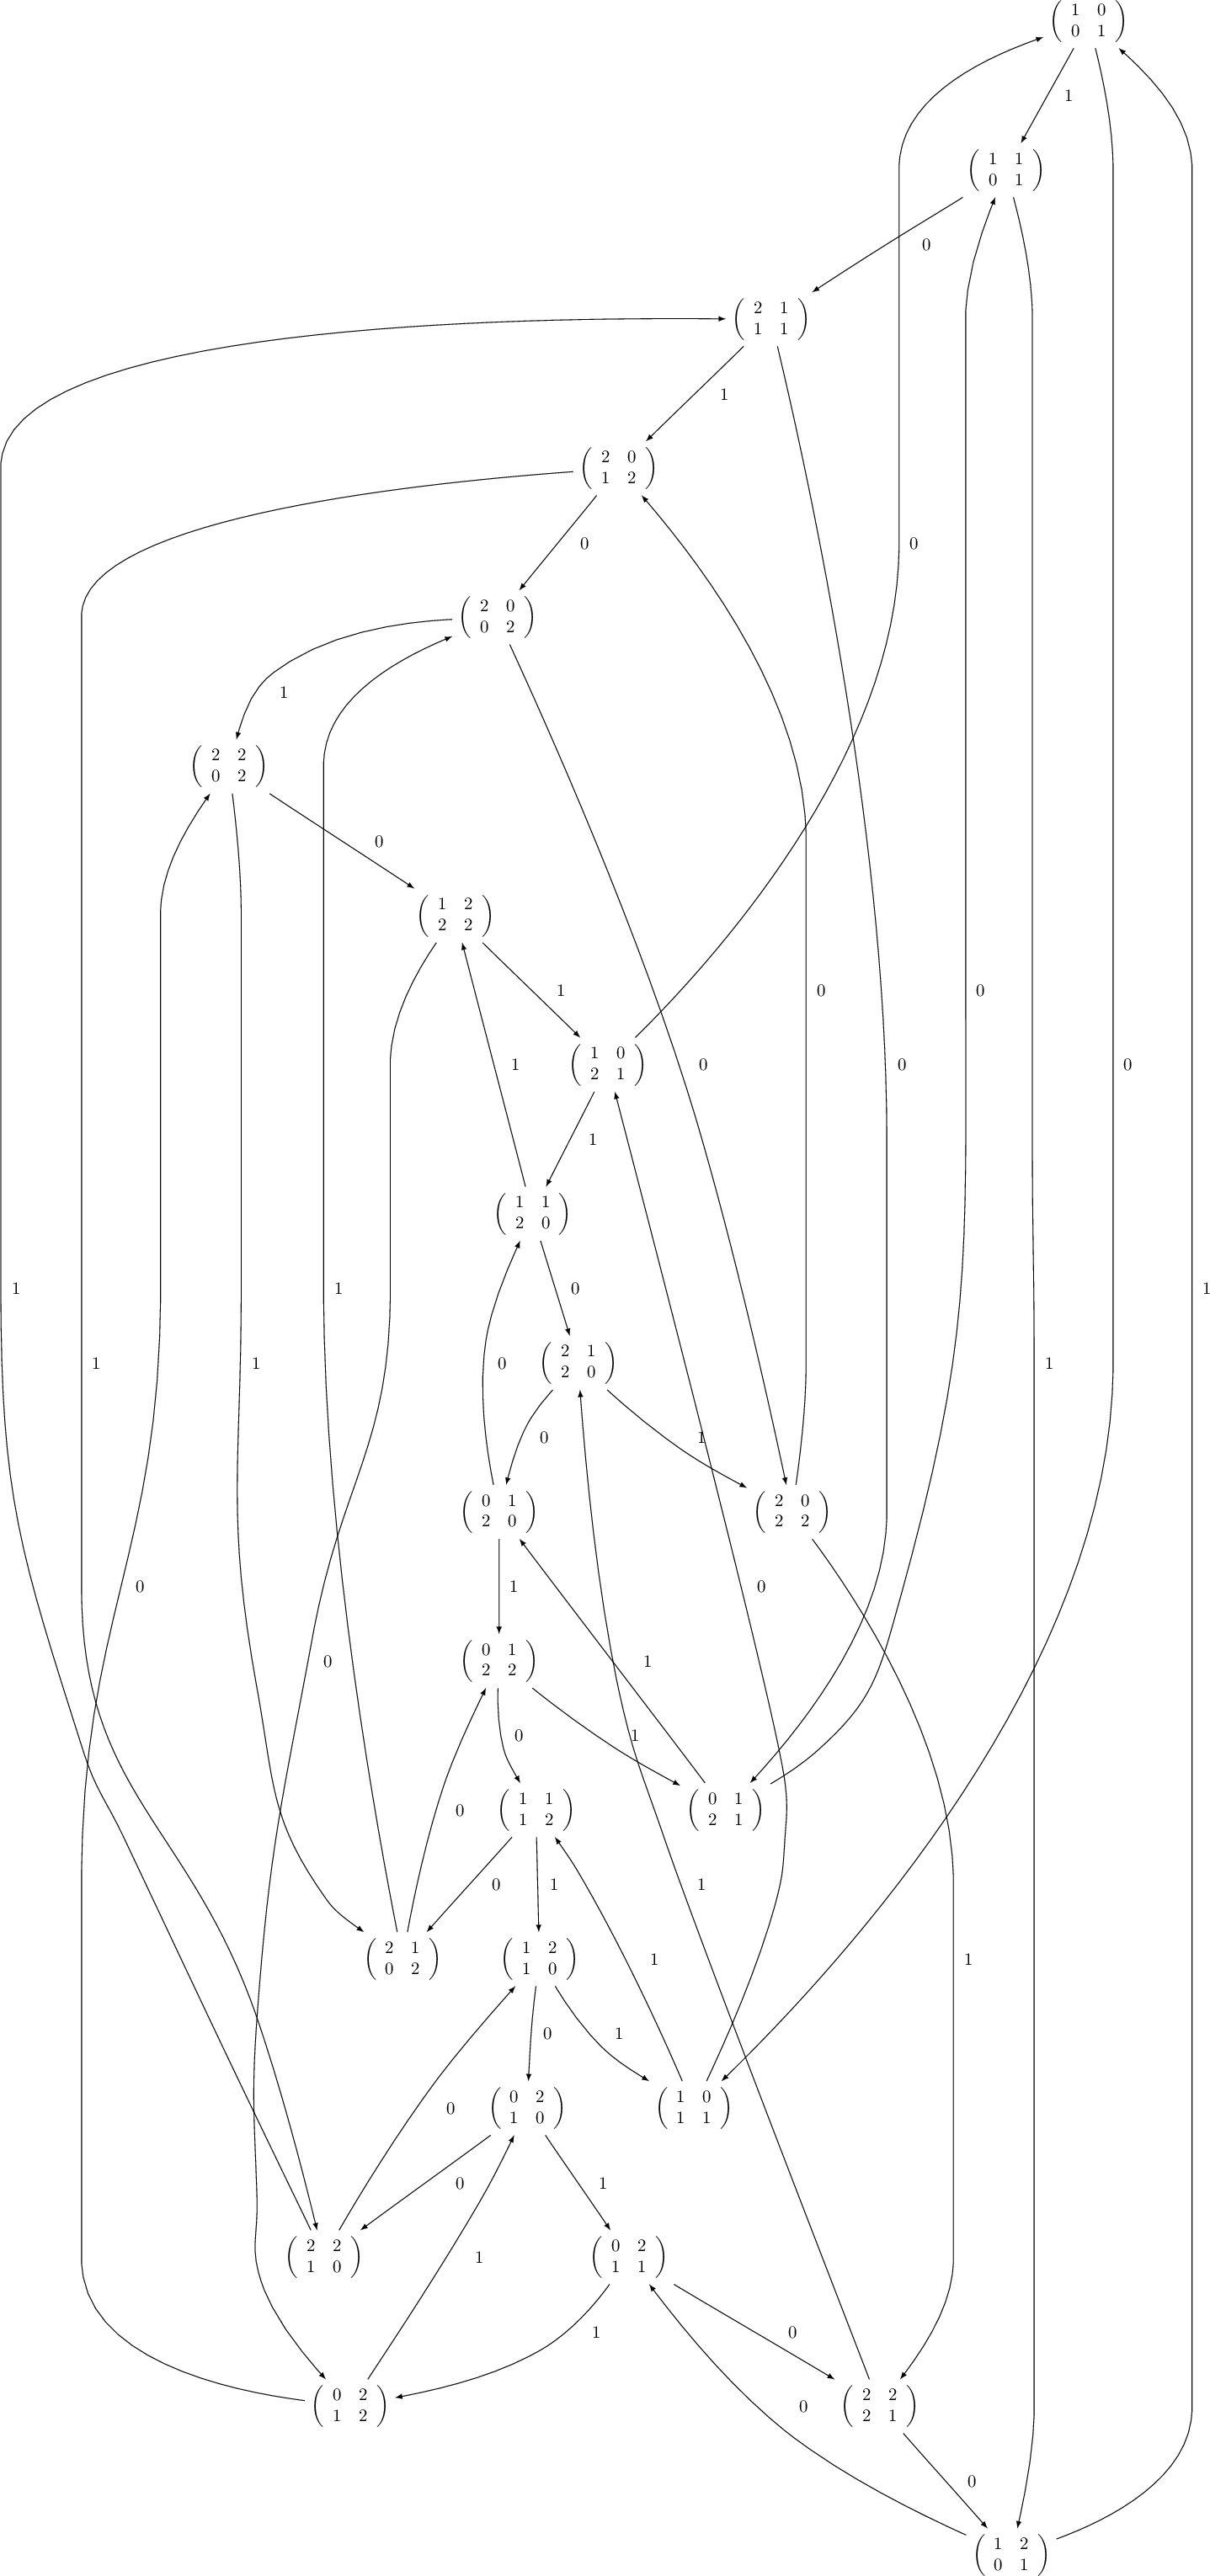

In [38]:
TikzPicture.from_graph(G)

Other algorithms can be used, for example `circo`:

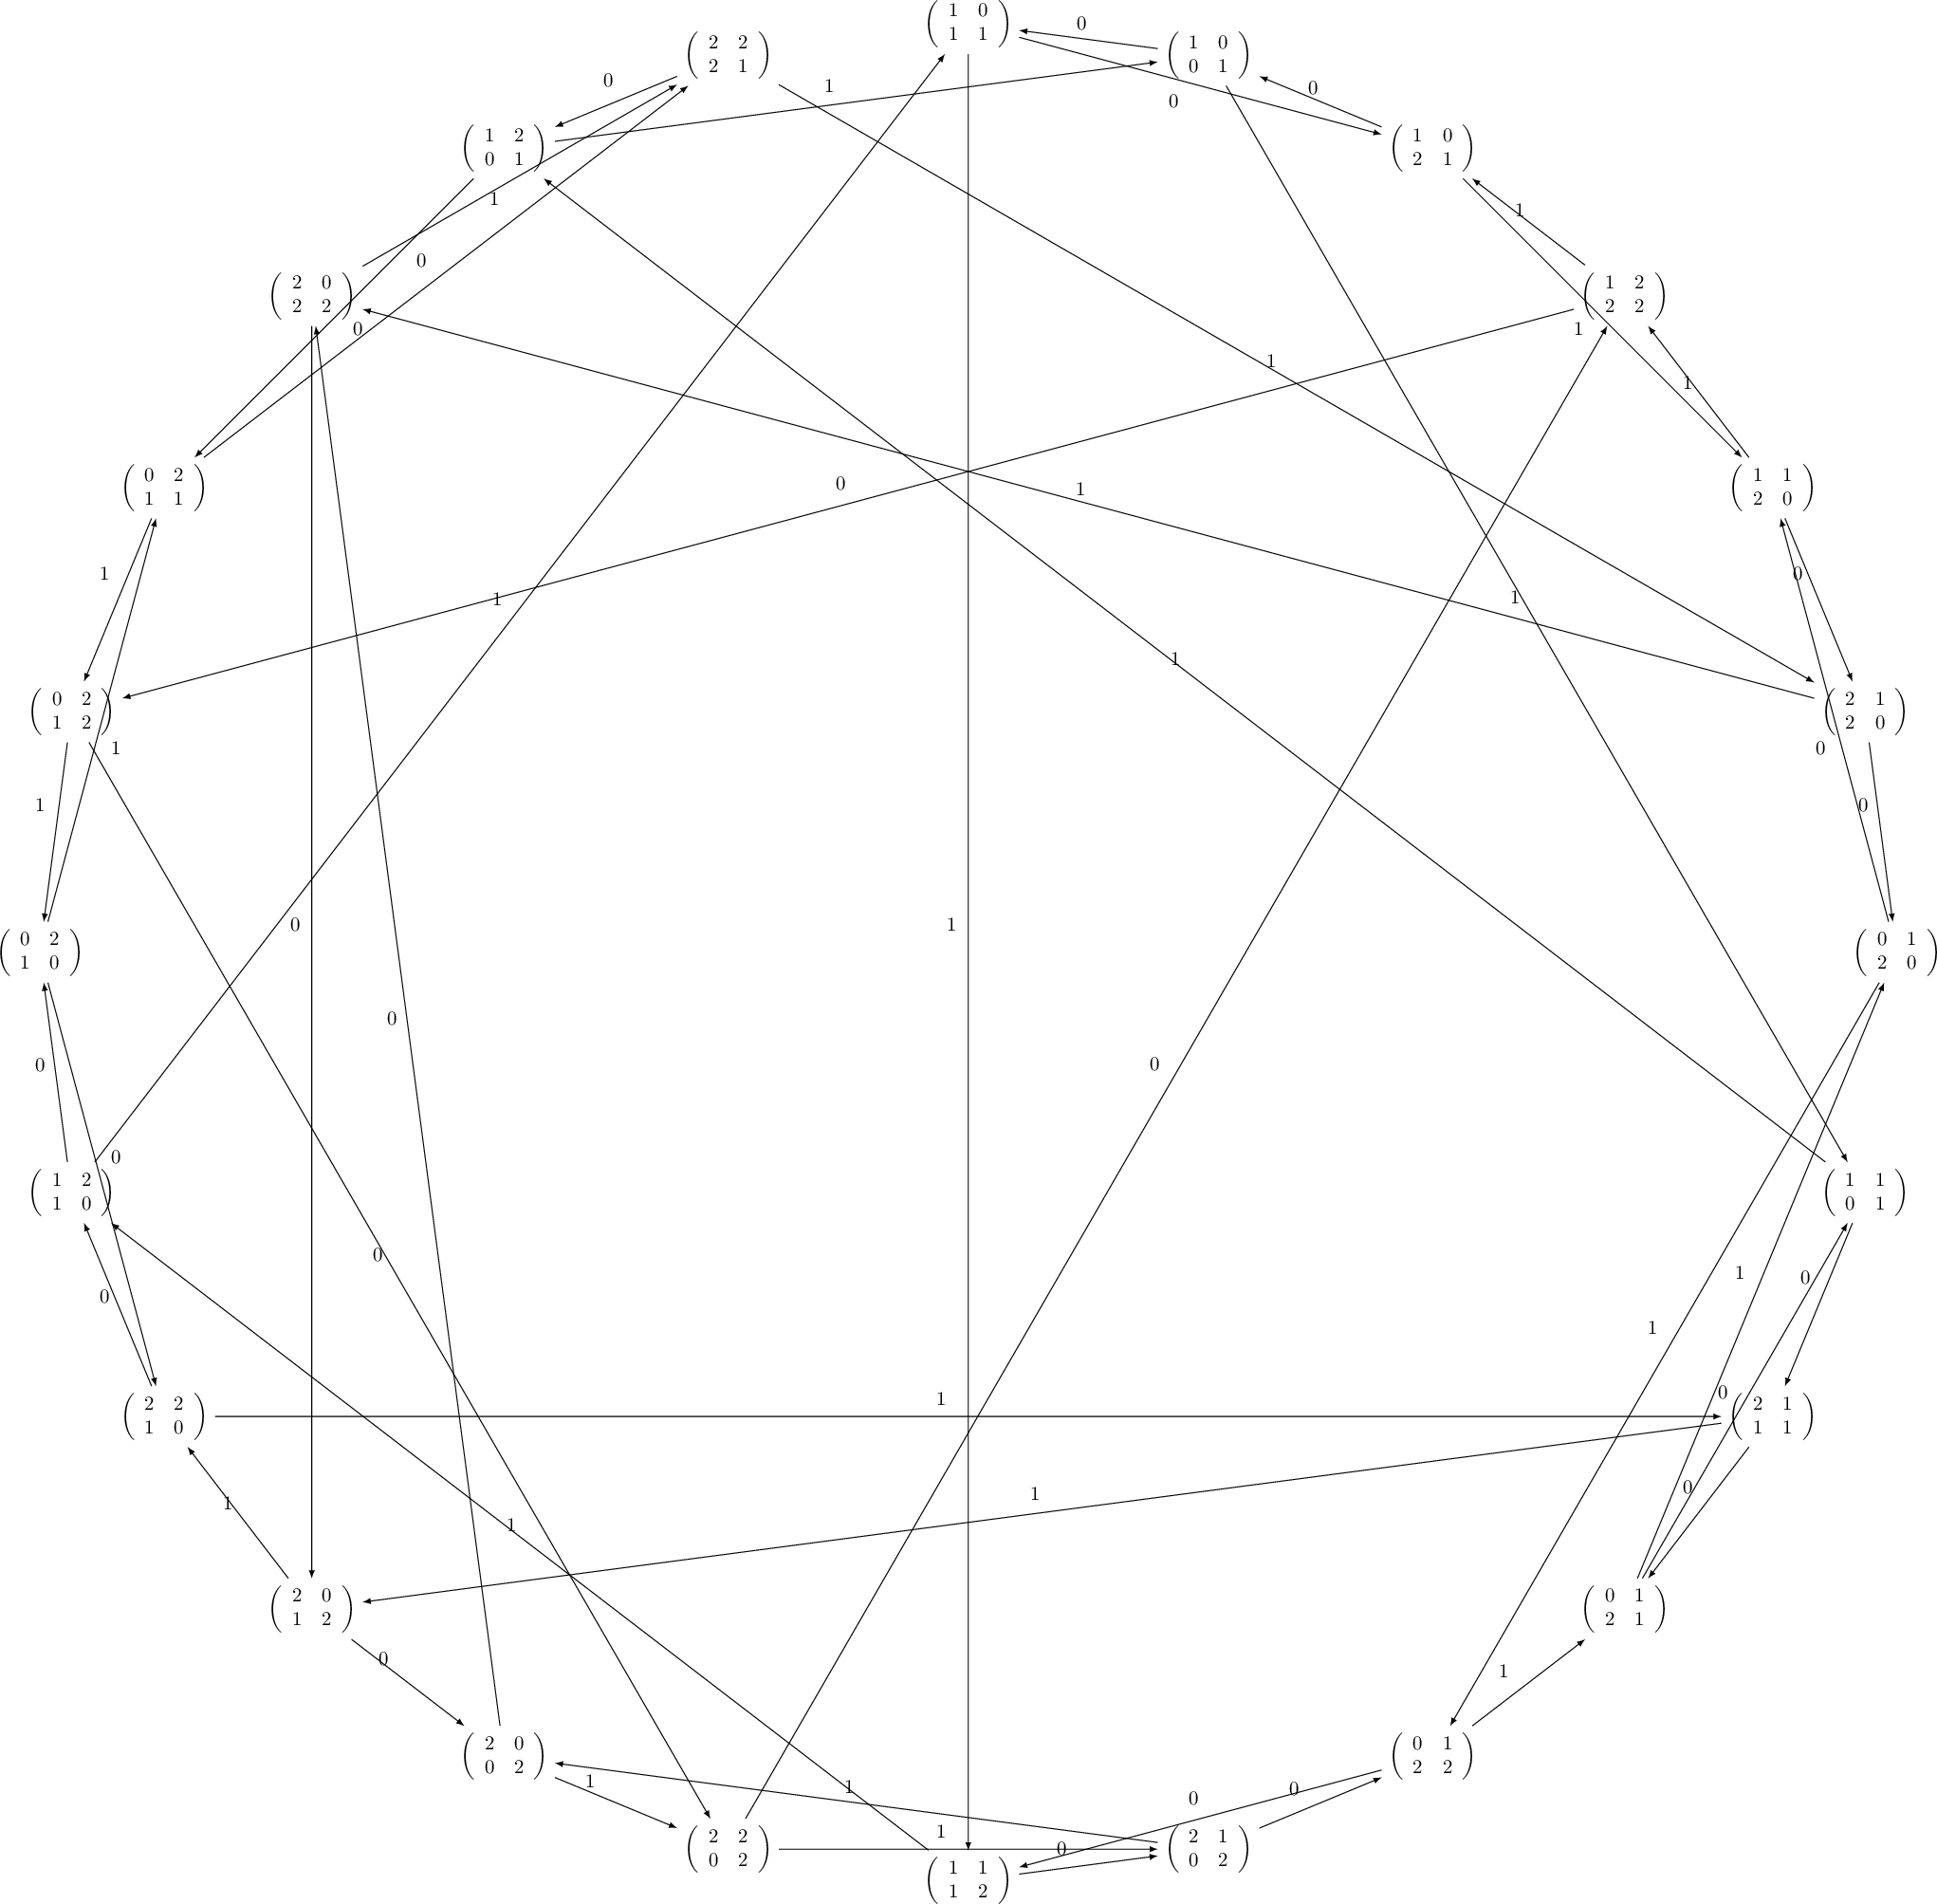

In [39]:
TikzPicture.from_graph(G, prog='circo')